In [1]:
import torch
from supervoice.model import SuperVoice
from train_config import config
from utils.misc import dict_to_object, plot_specgram, plot_waveform
from IPython.display import Audio, display

In [2]:
# Load model
device = "cpu"
model = SuperVoice(config)
model.audio_model.load_state_dict(torch.load(f'./output/audio_fp16_release.pt', map_location="cpu")['model'])
model.duration_model.load_state_dict(torch.load(f'./output/duration_pre.pt', map_location="cpu")['model'])
model.vocoder.load_state_dict(torch.load("../supervoice-vocoder/output/pre.pt", map_location="cpu")['generator'])
model.eval()
model.vocoder.remove_weight_norm()

/home/steve/miniconda/envs/gym/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Removing weight norm...


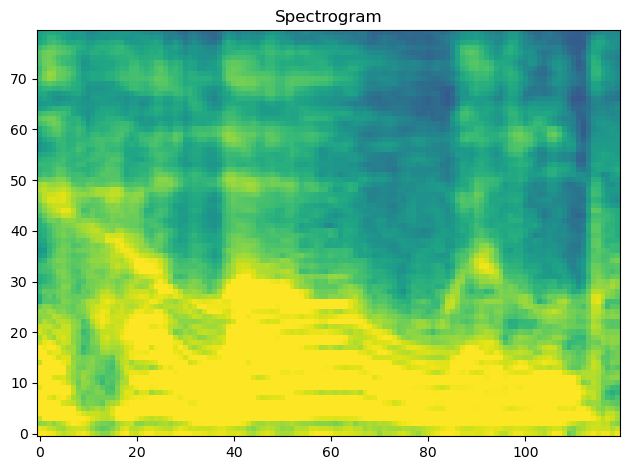

In [7]:
spec, audio = model.tts("Hello world", steps = 4)
plot_specgram(spec.detach().transpose(1,0).cpu())
display(Audio(data=audio, rate=16000))